# DS-210: Programming for Data Science


# Lecture 8: Optimization and Linear Programming


## Attendance poll: https://piazza.com/class/lrat4tm83gbnz

## Optimization

* Traditional area of **Operations Research**


**Why study optimization?**

* Important when making business decision based on data

* Also at heart of many machine learning methods

  * $k$–means (previous lecture)
  
  * deep learning and neural networks

### Today: Linear Programming

### General setting

* a number of real variables: $x_1$, $x_2$, $\ldots$, $x_n$

* a number of linear constraints:

$$b_{1,1} x_1 + \cdots + b_{1,n} x_n \le d_1 $$

$$\vdots$$

$$b_{t,1} x_1 + \cdots + b_{t,n} x_n \le d_t $$

* Goal: maximize or minimize $c_1 x_1 + c_2 x_2 + \cdots + c_n x_n$


### Simple Example

* variables: $x$ and $y$

* linear constraints:
  $$x \ge 0$$

  $$y \ge 0$$
  
  $$5x+4y\le20$$
  
  $$3x + 5y \le 15$$



* **Goal:** maximize $x + y$

<div align="center"></div>

<div align="center"></div>

<div align="center"></div>

<div align="center"></div>

### Simple Example

* variables: $x$ and $y$

* linear constraints:
  $$x \ge 0$$
  $$y \ge 0$$
  $$5x+4y\le20$$
  $$3x + 5y \le 15$$

* **Goal:** maximize $x + y$

<div align="center"></div>

* Maximized for $(x,y) = (\frac{40}{13}, \frac{15}{13})$
* [Wolfram Alpha Solver](https://tinyurl.com/2rjtcz3n)
* [The simplex method](https://dl.acm.org/doi/pdf/10.1145/87252.88081)
* [The tableau algorithm](https://math.libretexts.org/Bookshelves/Applied_Mathematics/Applied_Finite_Mathematics_(Sekhon_and_Bloom)/04%3A_Linear_Programming_The_Simplex_Method/4.02%3A_Maximization_By_The_Simplex_Method)

## The tableau alglorithm

Let's optimize this problem:

N has two jobs.  She need 2 hours of prep time for every hour of work at Job 1 and 1 hour of prep time for each hour of work at job 2.  She wants work a max of 12 hours per week and spend no more than 16 hours preparing.  Job 1 pays  \\$40/hour and job 2 pays \\$30/hour.  How many hours should she work at each job?  This can be written as

Maximize Z

Z = 40x1 + 30x2 subject to  
x1 + x2 <= 12  
2x1 + x2 <= 16  
x1,x2 >=0  


### Rewrite as equalities
-40x1 - 30x2 + Z = 0  
x1 + x2 + y1 = 12  
2x1 + x2 + y2 = 16   
    
### Construct the tableau
    
|x1|x2|y1|y2|Z|C|
|:--:|:--:|:--:|:--:|:--:|:--:|
|1|1|1|0|0|\| 12|
|**2**|1|0|1|0|\| 16|
|-40|-30|0|0|1|\| 0|  
    
### Find the column with the largest negative number

This would be column 1.  Intuition is to find the coefficient that will increase the value of our function the fastest.

### Find the row with the smallest quotient between the column from the previous step and the constraint column

This would be row 2 (16/2 = 8).  Intuition is this is the hardest constraint of the 2 so we need to obey it.

### Pivot on the selected row to make the element on the pivot 1 and corresponding element on the other rows zero

|x1|x2|y1|y2|Z|C|
|:--:|:--:|:--:|:--:|:--:|:--:|
|0|1/2|1|-1/2|0|\| 4|
|1|1/2|0|1/2|0|\| 8|
|0|-10|0|20|1|\| 320|


### Repeat until there are no more negative numbers in the bottom row
<p>
<p>
<center><b>Identify the row to use (row 1).</b></center>

|x1|x2|y1|y2|Z|C|
|:--:|:--:|:--:|:--:|:--:|:--:|
|0|**1/2**|1|-1/2|0|\| 4|
|1|1/2|0|1/2|0|\| 8|
|0|-10|0|20|1|\| 320|  

<p>
<p>
<center><b>Turn the column into 1.</b></center>  

|x1|x2|y1|y2|Z|C|
|:--:|:--:|:--:|:--:|:--:|:--:|
|0|**1**|2|-1|0|\| 8|    
|1|1/2|0|1/2|0|\| 8|
|0|-10|0|20|1|\| 320|  

<p>
<p>
<center><b>Complete the elimination.</b></center>

|x1|x2|y1|y2|Z|C|
|:--:|:--:|:--:|:--:|:--:|:--:|
|0|1|2|-1|0|\| 8|
|1|0|-1|1|0|\| 4|
|0|0|20|10|1|\| 400|  

### Drop the y variables and you are left with 
x2 = 8  
x1 = 4  
for a total income of \\$400

You can backfill the x1 and x2 values into the top equations to see if any work or prep times is wasted due to the constraints.  In this case the answer is no, but it could be yes in some other setup.

In reality you don't just drop the y variables --  Some columns will have a pattern of 0, 1, 0 (with a single 1 somewhere amongst the 0s).  The 1 identifies the variable that is part of the final solution and the C column has the value of the variable in the same row as the 1.  Columns that do not have this pattern represent variables whose final value is 0.  If the pattern appears on a slack variable this implies left over resources that could not be used!  Finally if all pivot

To follow another example here
https://www.imse.iastate.edu/files/2015/08/Explanation-of-Simplex-Method.docx#:~:text=The%20Simplex%20method%20is%20an,solution%20of%20an%20optimization%20problem.


## Example: get cars to dealerships cheaply

* Five dealerships with demands: `[20,40,10,25,10]`
* Three warehouses with inventory: `[25,45,40]`
* The cost of moving **one** car from warehouse `i` to dealership `j`: `cost[i][j]`

**Goal:** Satisfy all demands while paying as little as possible for moving cars

In [1]:
dealerships = [20,40,10,25,10]
warehouses = [25,45,40]

In [2]:
import numpy as np
# set costs to random between 1000 and 2000
cost = np.random.uniform(low=1000.0,high=2000.0,
                         size=(3,5))
print(cost)

[[1592.45673871 1037.0884715  1985.7190821  1665.4685452  1173.5026139 ]
 [1502.48764509 1644.81283885 1686.88901028 1095.00981071 1462.94922075]
 [1194.58514553 1057.77313688 1404.29798636 1519.33823995 1602.82934261]]


**Variables $x_{i,j}$:** correspond to the number of cars moved from warehouse $i$ to dealership $j$.

<div align="center">
<b>What constraints do we need?</b>
</div>

## Example: get cars to dealerships cheaply

Can't move negative numbers of cars:
$$x_{i,j} \ge 0$$

Each warehouse $i$ can't send more than its inventory:
$$\sum_{j=1}^5 x_{i,j} \le \mbox{warehouses}[i]$$

Demand of each dealership $j$ is satisfied:
$$\sum_{i=1}^3 x_{i,j} = \mbox{dealerships}[j]$$

**Goal:** minimize total cost $\sum_{i=1}^3\sum_{j=1}^5 x_{i,j} \cdot \mbox{cost}[i][j]$

## Solving linear programming with SciPy

[SciPy Linear Programming](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html)

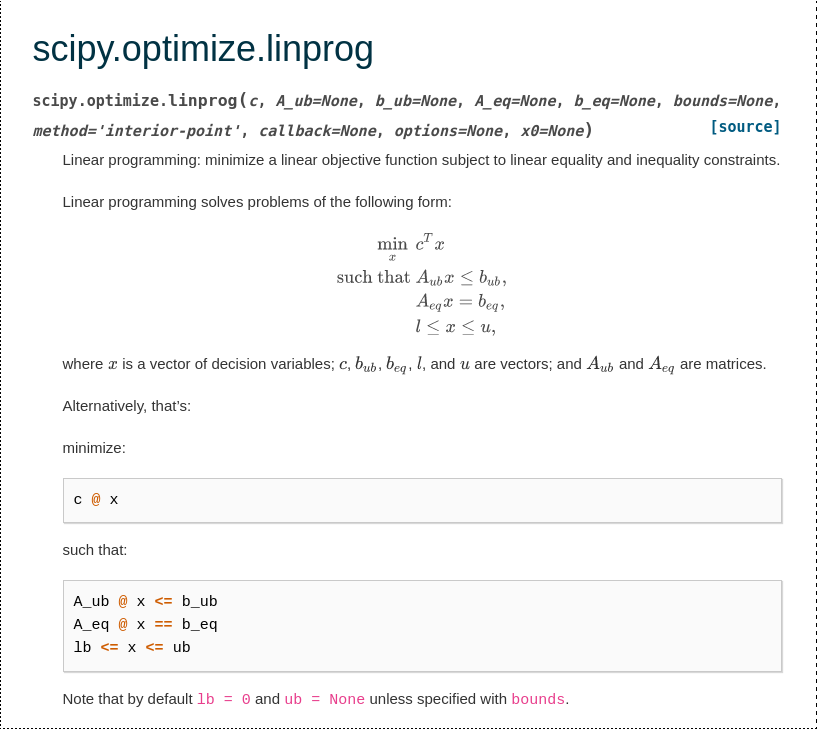


<br><br><br><br>

* Minimize $c * x$ such that
* $A\_ub * x <= b\_ub$
* $A\_eq * x <= b\_eq$
* $bounds = [l,u] $ with $l<=x<=y$

Notes:

* Make sure you understand the matrix multiplication notation in the docs

* Adjust your linear program to the required form:

  * Make constraints "less then" with variables on the left
  * Make minimization the goal (multiply by $-1$ if you are maximizing!)

## Applying SciPy to our problem

In [3]:
# convert cost to one dimensional vector
c = cost.ravel()
print(c)

[1592.45673871 1037.0884715  1985.7190821  1665.4685452  1173.5026139
 1502.48764509 1644.81283885 1686.88901028 1095.00981071 1462.94922075
 1194.58514553 1057.77313688 1404.29798636 1519.33823995 1602.82934261]


In [4]:
# Remember that
# demands = [20,40,10,25,10]
# inventory = [25,45,40]
# make sure not too much transported out of each warehouse
# Why is our matrix 3X15 instead of 3X5?
# Because we have 15 variables but only 5 at time contribute to how many cars are moving out of each warehouse
# The matrix has 3 rows with the 1s in each row signifying which variables contribute to that warehouse
zeros,ones = [0, 0, 0, 0, 0], [1, 1, 1, 1, 1]
A_ub = [
    ones + zeros + zeros,
    zeros + ones + zeros,
    zeros + zeros + ones
]
b_ub = warehouses
A_ub,b_ub

([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]],
 [25, 45, 40])

In [5]:
# make sure demands at dealerships are satisified
# Similarly here.  We have a 5x15 matrix because we have 5 dealerships and 15 variables
# The 1s in the row signify which variables contribute to that dealership
def dealearship(j):
    jth = [1 if k == j else 0 for k in range(5)]
    return jth + jth + jth
A_eq = [dealearship(j) for j in range(5)]
b_eq = dealerships
A_eq,b_eq

([[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
  [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
  [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
  [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
  [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]],
 [20, 40, 10, 25, 10])

In [6]:
# make sure variables are non-negative
# as we can not move a negative number of cars out of a warehouse.  Must be at least 0.
# (None means no upper or lower bound)
bounds = [(0,None) for i in range(15)]
bounds

[(0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None)]

In [7]:
from scipy.optimize import linprog
solution = linprog(c,A_ub,b_ub,A_eq,b_eq,bounds,method='revised simplex')
print("=============")
solution2 = linprog(c,A_ub,b_ub,A_eq,b_eq,bounds,method='highs')
print("status =",solution.status, "iters=", solution.nit, "cost=", solution.fun, "\nx=\n", solution.x.reshape(3,5))
print("=============")
print("status =",solution2.status, "iters=", solution2.nit, "cost=", solution2.fun, "\nx=\n", solution2.x.reshape(3,5))

status = 0 iters= 15 cost= 123146.18420966317 
x=
 [[ 0. 25.  0.  0.  0.]
 [ 0.  0.  5. 25. 10.]
 [20. 15.  5.  0.  0.]]
status = 0 iters= 8 cost= 123146.18420966319 
x=
 [[ 0. 25.  0.  0.  0.]
 [ 0.  0.  5. 25. 10.]
 [20. 15.  5.  0.  0.]]


/var/folders/g0/grh98kn55sv7hc3src6dygvm0000gn/T/ipykernel_47234/2464744927.py:2: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  solution = linprog(c,A_ub,b_ub,A_eq,b_eq,bounds,method='revised simplex')


## Various optimization options

### Parameter `method`

* Simplex (`simplex`, `revised simplex`)

  - deprecated and will be removed going forward
  
* Interior point (`interior-point`)

   - faster for some inputs, also deprecated

* `highs, highs-ds, highs-ipm` are more efficient C++ implementation of the above.  `highs` is the default.



## Digression: How to check if something is zero?

With finite–precision computer arithmetic, you should check if $|x| < 10^{-6}$ or another sufficiently small number

In [ ]:
result = 0.3 - 3 * 0.1
print(result)

In [ ]:
print("Test 1:", result == 0)


In [ ]:

# better test
def is_zero(x):
    return x < 1e-6 and x > -1e-6
print("Test 2:", is_zero(result))


## Floating Point Representation in Computers
![](floating_point.png)

In [ ]:
import struct
def float_to_binary(x):
    return list(map(lambda x:format(x,'08b') , list(struct.pack("!f", x))))

x = -100.1
print(float_to_binary(x))

x = 100.1
print(float_to_binary(x))

x = 128.0
print(float_to_binary(x))



## What about Integers?

* Sign followed by value
* No sign for unsigned integers
* All computer representations in binary
* Human versions commonly in binary, decimal, octal and hexadecimal

## Convex vs. non-convex optimization

<div align="center"></div>
<div align="center">Convex</div>

<div align="center"></div>
<div align="center">Non-convex</div>

* Linear programming is an example of convex optimization
* Convex optimization is easier from a computational perspective